In [3]:
setwd('/import/DB/zhang//data')

In [4]:
meta = readRDS('copykatres.rds')

In [9]:
library(dplyr)

In [ ]:
# bad1 = meta %>% dplyr::filter(copykat.tumor.pred %in% c('tumor cluster 1','tumor cluster 2','tumor cluster 3')) %>% rownames()

# bad2 = infercnv %>%  filter(Annotation.Group == 2) %>%  rownames()

# intersect(bad1,bad2)

# head(bad1)

# head(bad2)

In [10]:
sce = readRDS('OS.final.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [11]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject



In [25]:
sce1 = AddMetaData(sce,meta)

In [ ]:
Idents(sce1) = 'copykat.tumor.pred'

options(repr.plot.height = 9,repr.plot.width = 8)

unique(sce1$copykat.tumor.pred)

Idents(sce1) = 'copykat.tumor.pred'

sce1 = subset(sce1,idents = c('normal','tumor cluster 1','tumor cluster 2','tumor cluster 3'))

table(sce1$copykat.tumor.pred)

sce1$copykat.tumor.pred = ifelse(sce1$copykat.tumor.pred == 'normal','diploid','aneuploid')

Idents(sce1) = 'copykat.tumor.pred'

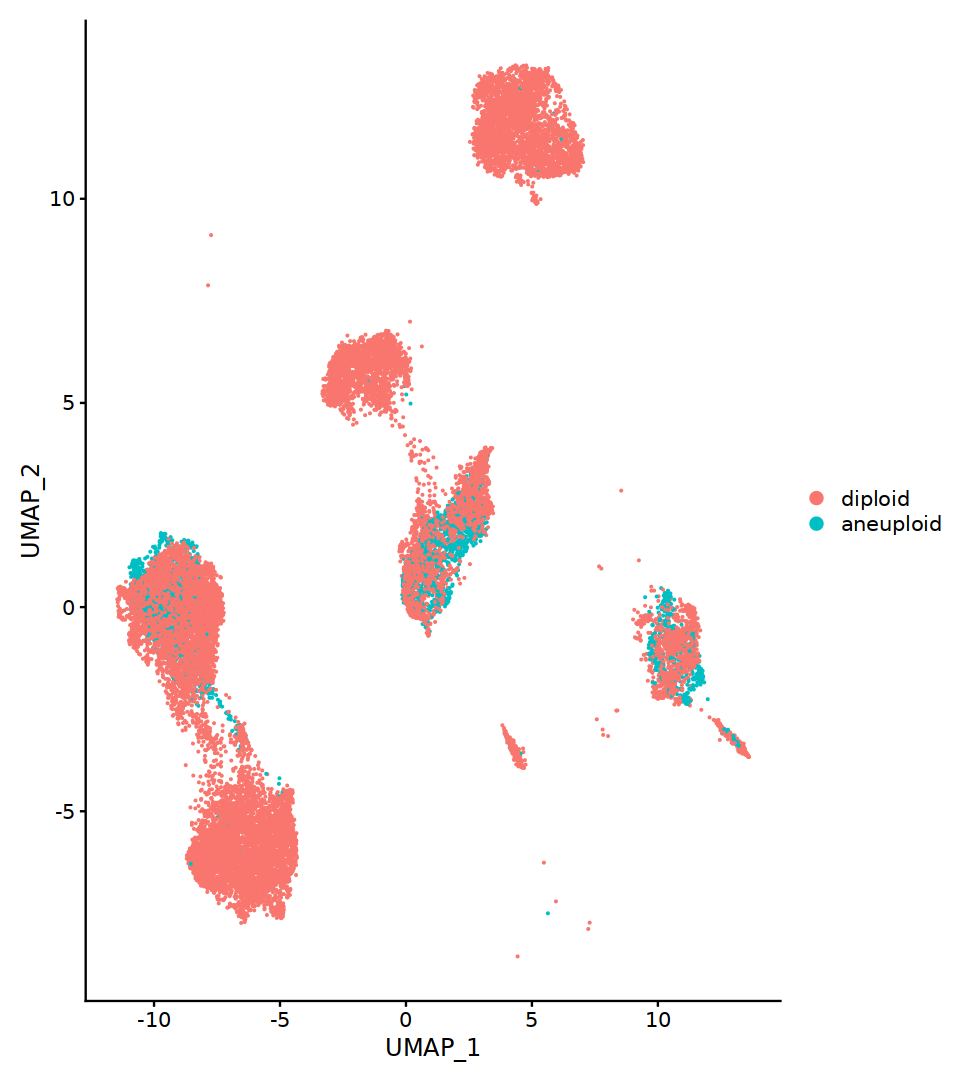

In [34]:
DimPlot(sce1)

In [38]:
options(repr.plot.width = 9,repr.plot.height = 5)

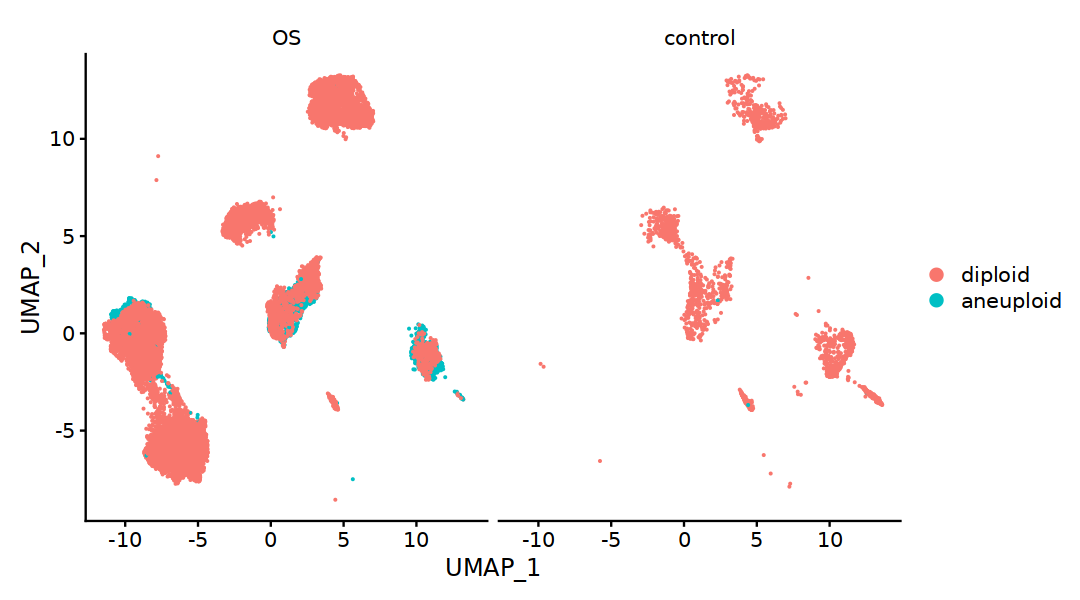

In [39]:
DimPlot(sce1,split.by = 'group')

In [36]:
table(sce1$copykat.tumor.pred,sce1$group)

           
               OS control
  aneuploid  4033       4
  diploid   13454    2025

In [37]:
saveRDS(sce1,file = 'OS.add.copykat.rds')